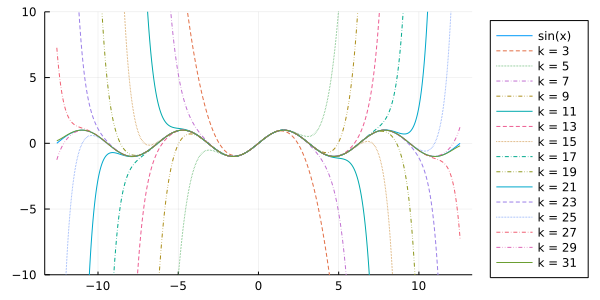

In [1]:
using Plots
using TaylorSeries

n = 15
x = range(-4π, 4π; length=1000)
plot(; legend=:outertopright)
plot!(x, sin.(x); label="sin(x)")
for k in 3:2:2n+1
    f(x) = evaluate(sin(Taylor1(k)), x)
    plot!(x, f.(x); label="k = $k", ls=:auto)
end
plot!(; ylim=(-10, 10), size=(600, 300))

In [2]:
using Plots
using QuadGK

function fourier_coeffs(f, N)
    a, b = eps(), 1-eps()
    c = Vector{Float64}(undef, 2N+1)
    c[1] = quadgk(f, a, b)[1]
    for k in 1:N
        c[k+1]   = quadgk(x -> cospi(2k*x)*f(x), a, b)[1]
        c[k+N+1] = quadgk(x -> sinpi(2k*x)*f(x), a, b)[1]
    end
    c
end

function fourier_sum(x, c, N)
    L = (length(c) - 1) ÷ 2
    c[1] + 2sum(c[k+1]*cospi(2k*x) + c[k+L+1]*sinpi(2k*x) for k in 1:N)
end

function fourier_plot(f, N=20)
    c = fourier_coeffs(f, N)
    x = range(-0.6, 1.6; length=1101)
    plot(; legend=:outertopright)
    f_mod1(x) = f(mod(x, 1))
    plot!(x, f_mod1.(x); label="f(mod(x, 1))")
    for k in (N, N÷5)
        f_k(x) = fourier_sum(x, c, k)
        plot!(x, f_k.(x); label="k = $k")
    end
    plot!(; size=(600, 300))   
end

fourier_plot (generic function with 2 methods)

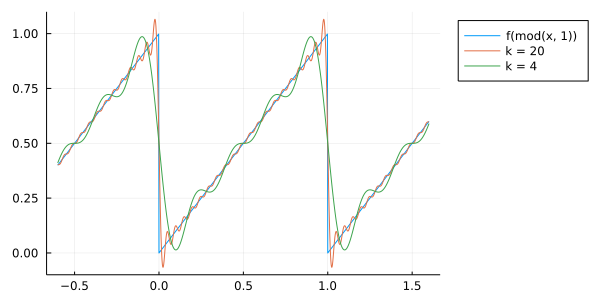

In [3]:
f(x) = x
fourier_plot(f)

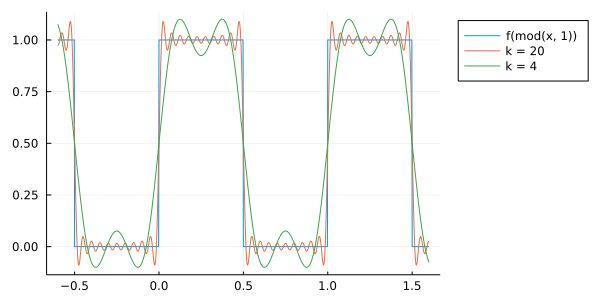

In [4]:
f(x) = 0 ≤ x < 0.5 ? 1.0 : 0.0
fourier_plot(f)

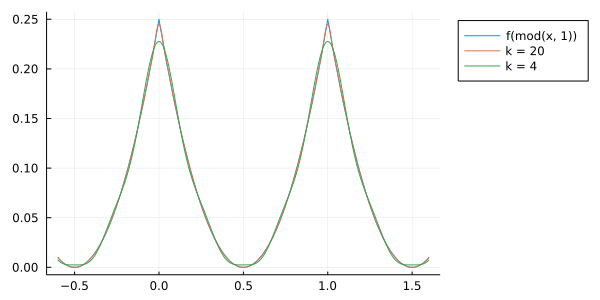

In [5]:
f(x) = (x - 0.5)^2
fourier_plot(f)